### Importación de datos



In [24]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación

In [ ]:
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

In [ ]:
df_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [ ]:
facturacion_por_tienda = df_completo.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)

In [ ]:
print("Facturación Total por Tienda (en orden descendente):")
print(facturacion_por_tienda.map('{:,.2f}'.format))

Facturación Total por Tienda (en orden descendente):
Tienda
Tienda 1    1,150,880,400.00
Tienda 2    1,116,343,500.00
Tienda 3    1,098,019,600.00
Tienda 4    1,038,375,700.00
Name: Precio, dtype: object


# 2. Ventas por categoría

In [29]:
ventas_por_categoria = df_completo.groupby(['Tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad de Ventas')

In [30]:
idx_max = ventas_por_categoria.groupby('Tienda')['Cantidad de Ventas'].transform("max") == ventas_por_categoria['Cantidad de Ventas']
categorias_mas_populares = ventas_por_categoria[idx_max].sort_values(by=['Tienda', 'Cantidad de Ventas'], ascending=[True, False])

In [31]:
print("Categoría Más Popular (por cantidad de ventas):")
print(categorias_mas_populares)

Categoría Más Popular (por cantidad de ventas):
      Tienda Categoría del Producto  Cantidad de Ventas
7   Tienda 1                Muebles                 465
15  Tienda 2                Muebles                 442
23  Tienda 3                Muebles                 499
31  Tienda 4                Muebles                 480


# 3. Calificación promedio de la tienda


In [32]:
calificacion_promedio = df_completo.groupby('Tienda')['Calificación'].mean().sort_values(ascending=True)

In [33]:
print("Calificación Promedio de los Clientes por Tienda (orden ascendente - de peor a mejor):")
print(calificacion_promedio.map('{:.2f}'.format))

Calificación Promedio de los Clientes por Tienda (orden ascendente - de peor a mejor):
Tienda
Tienda 1    3.98
Tienda 4    4.00
Tienda 2    4.04
Tienda 3    4.05
Name: Calificación, dtype: object


# 4. Productos más y menos vendidos

In [34]:
ventas_por_producto = df_completo.groupby(['Tienda', 'Producto']).size().reset_index(name='Cantidad de Ventas')

In [35]:
idx_max = ventas_por_producto.groupby('Tienda')['Cantidad de Ventas'].transform("max") == ventas_por_producto['Cantidad de Ventas']
productos_mas_vendidos = ventas_por_producto[idx_max].sort_values(by='Tienda')

In [36]:
idx_min = ventas_por_producto.groupby('Tienda')['Cantidad de Ventas'].transform("min") == ventas_por_producto['Cantidad de Ventas']
productos_menos_vendidos = ventas_por_producto[idx_min].sort_values(by=['Tienda', 'Cantidad de Ventas'])

In [37]:
print("\nProductos Más Vendidos por Tienda (Top Venta):")
print(productos_mas_vendidos)


Productos Más Vendidos por Tienda (Top Venta):
       Tienda                   Producto  Cantidad de Ventas
1    Tienda 1                    Armario                  60
33   Tienda 1                 Microondas                  60
48   Tienda 1              TV LED UHD 4K                  60
75   Tienda 2  Iniciando en programación                  65
129  Tienda 3              Kit de bancas                  57
163  Tienda 4                   Cama box                  62


In [38]:
print("\nProductos Menos Vendidos por Tienda (Lenta Rotación):")
print(productos_menos_vendidos.head(4))


Productos Menos Vendidos por Tienda (Lenta Rotación):
       Tienda                   Producto  Cantidad de Ventas
4    Tienda 1  Auriculares con micrófono                  33
13   Tienda 1               Celular ABXY                  33
77   Tienda 2              Juego de mesa                  32
111  Tienda 3    Bloques de construcción                  35


# 5. Envío promedio por tienda

In [39]:
costo_envio_promedio = df_completo.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)

In [40]:
print("Costo Promedio de Envío por Tienda (orden descendente - de más caro a más barato):")
print(costo_envio_promedio.map('{:,.2f}'.format))

Costo Promedio de Envío por Tienda (orden descendente - de más caro a más barato):
Tienda
Tienda 1    26,018.61
Tienda 2    25,216.24
Tienda 3    24,805.68
Tienda 4    23,459.46
Name: Costo de envío, dtype: object


# 6. Gráfica de Facturación Total (Sección #1)

In [41]:
import matplotlib.pyplot as plt

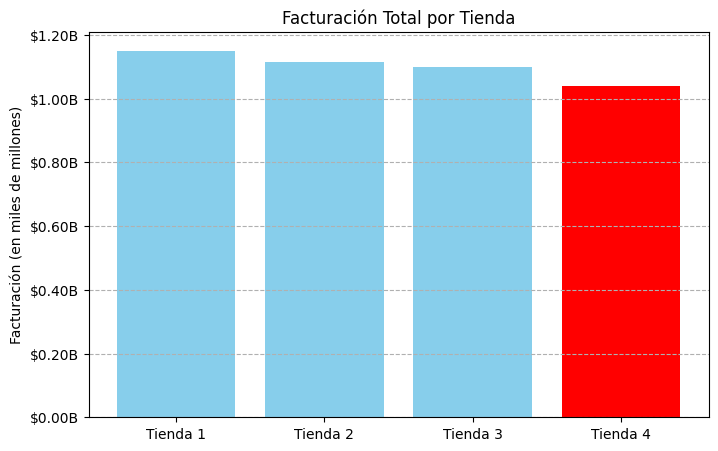

In [42]:
# Gráfica de Barras para Facturación Total
plt.figure(figsize=(8, 5))
# Obtenemos solo los valores
ejes_y = facturacion_por_tienda.values
ejes_x = facturacion_por_tienda.index

# Pintamos la barra de la Tienda 4 de un color diferente (rojo)
colores = ['skyblue', 'skyblue', 'skyblue', 'red']

plt.bar(ejes_x, ejes_y, color=colores)
plt.title('Facturación Total por Tienda')
plt.ylabel('Facturación (en miles de millones)')
plt.xticks(rotation=0)

# Simplificamos las etiquetas del eje Y (a millones)
def formato_millones(x, pos):
    return f'${x/1e9:.2f}B'

import matplotlib.ticker as ticker
formato = ticker.FuncFormatter(formato_millones)
plt.gca().yaxis.set_major_formatter(formato)

plt.grid(axis='y', linestyle='--')
plt.show()

# 7. Gráfica de Calificación Promedio (Sección #3)

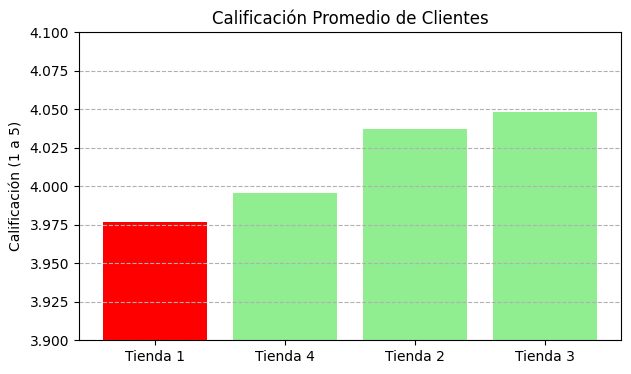

In [43]:
# Gráfica de Barras para Calificación Promedio
plt.figure(figsize=(7, 4))

ejes_y = calificacion_promedio.values
ejes_x = calificacion_promedio.index

# Coloreamos la Tienda 1 de rojo (el peor resultado)
colores = ['red' if tienda == 'Tienda 1' else 'lightgreen' for tienda in ejes_x]

plt.bar(ejes_x, ejes_y, color=colores)
plt.title('Calificación Promedio de Clientes')
plt.ylabel('Calificación (1 a 5)')
plt.ylim(3.9, 4.1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# 8. Gráfica de Costo Promedio de Envío (Sección #5)

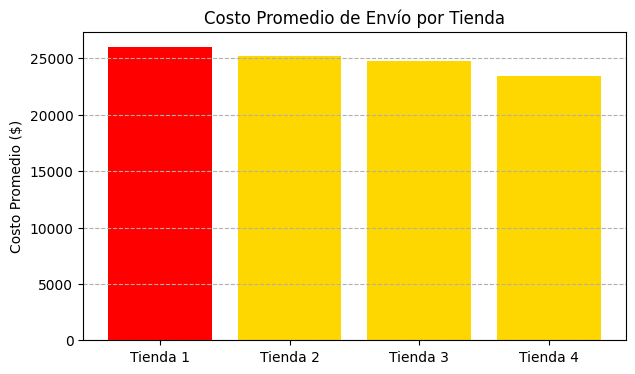

In [44]:
# Gráfica de Barras para Costo Promedio de Envío
plt.figure(figsize=(7, 4))

ejes_y = costo_envio_promedio.values
ejes_x = costo_envio_promedio.index

# Coloreamos la Tienda 1 de rojo (el costo más alto)
colores = ['red' if tienda == 'Tienda 1' else 'gold' for tienda in ejes_x]

plt.bar(ejes_x, ejes_y, color=colores)
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Costo Promedio ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()